In [37]:
from statistics import fmean, pstdev
import numpy as np
rng = np.random.default_rng()
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [38]:
def normalization_factor(xs):
    return (fmean(xs), pstdev(xs))

def normalized_input(xs, stats):
    m, s = stats
    return [(x - m) / s if s > 0 else 0 for x in xs]

In [52]:
# read file with single input variable

def read_input_file(filename):
    x = []
    y = []
    
    with open(filename) as f:
        lines = f.readlines()
        header = [i.strip() for i in lines[0].split(',')]
        assert len(header) == 2
        xlabel, ylabel = header
        for line in lines[1:]:
            line = [float(i.strip()) for i in line.split(',')]
            x.append(line[0])
            y.append(line[1])
            
    # normalize input to have mean 0 and standard deviation 1
    stats = normalization_factor(x)
    x_norm = normalized_input(x, stats)
    
    return np.array(x_norm), np.array(y), stats, x, xlabel, ylabel

In [53]:
dataset = 'demo'

In [55]:
# enter training data
filename = f'datasets/{dataset}/train.txt'

x, y, stats, x_old, xlabel, ylabel = read_input_file(filename)

In [56]:
tqdm._instances.clear()

In [57]:
# build model using training data
# gradient descent for loss function

def linear_regression(x, y):
    a = rng.uniform(-1, 1)
    b = rng.uniform(-1, 1)
    alpha = 0.01
    n = len(x)

    epochs = 100000 // n
    for e in trange(epochs):
        y_pred = a * x + b
        partial_a = sum(x * (y_pred - y)) / n
        partial_b = sum(y_pred - y) / n
        a -= alpha * partial_a
        b -= alpha * partial_b
        
    return a, b

In [58]:
# weights and bias learned
a, b = linear_regression(x, y)

100%|████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 20643.07it/s]


In [59]:
# read test file

def read_test_file(test_file):
    t = []
    
    with open(test_file) as f:
        lines = f.readlines()
        for line in lines[1:]:
            line = [float(i.strip()) for i in line.split(',')]
            t.append(line[0])
        
    return np.array(normalized_input(t, stats)), t

In [60]:
# test file
filename = f'datasets/{dataset}/test.txt'
t, t_old = read_test_file(filename)

In [62]:
# make predictions
# plot the graph

def plot (x, y, t, a, b):
    y_test = [a * i + b for i in t]
    
    # plot training input data points (input, output)
    plt.scatter(x_old, y, label="training data points") 
    
    # plot linear function learned from training data
    plt.plot(x_old, a * x + b, color='red', label='trained linear function')
    
    # plot predicted value for test file
    plt.scatter(t_old, y_test, color='orange', label="predicted output values")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

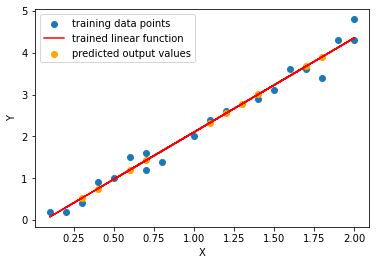

In [63]:
plot(x, y, t, a, b)